# A quasar.py Tutorial: Determining Quasar Redshifts

## Authors

Brendan Duong

## Version Date

21 August 2023

## Learning Goals

* Estimate the redshift of a target quasar with error
* Assess the accuracy of the estimate through spectral and statistical visualizations
* Understand how to troubleshoot bugs with the code

## Keywords

spectral archive, spectral analysis, cross-correlation, monte-carlo 

## Summary

In this tutorial, we will determine the redshift of a quasar reported in [Glikman et al. (2006)](https://ui.adsabs.harvard.edu/abs/2006ApJ...640..579G/abstract), the same paper from which this code's near-infrared quasar template is derived from. In doing so, we will understand how to estimate the redshift of any quasar with associated error, assess the estimate's accuracy, and understand how to troubleshoot the code.

## Starting off

Please ensure that splat is properly installed before going further. To start, we will import splat, quasar, and a couple helper packages:

In [1]:
import splat
from splat import quasar
import pandas as pd
from splat.core import Spectrum



Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
You are currently using version 2023.08.08

If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




## Determine quasar redshifts

The first step in determining quasar redshifts is to read the target data into a splat Spectrum object. The cell below demonstrates how to do this with one of the Glikman sources already in splat and plots the associated spectrum:

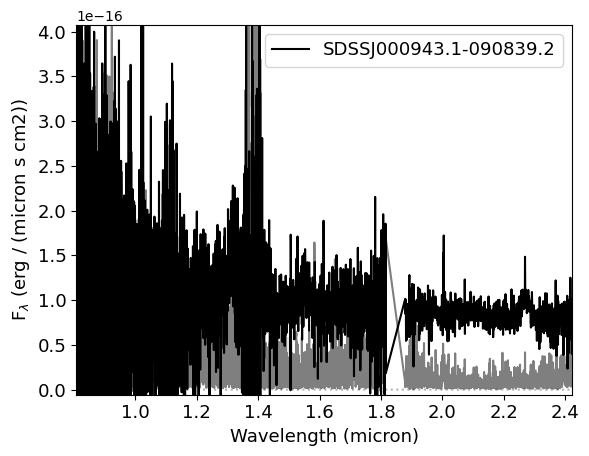

[<Figure size 640x480 with 1 Axes>]

<Figure size 640x480 with 0 Axes>

In [2]:
#read in the target data
targ_file = splat.SPLAT_PATH + '/resources/SpectralTemplates/GlikmanQuasars/SDSSJ000943.1-090839.2.txt'
targ_name = targ_file.split('/')[-1].replace('.txt', '')
targ_df = pd.read_fwf(targ_file, names = ['wave', 'flux', 'noise', 'redshift'])
targ_sp = Spectrum(wave = list(targ_df['wave']), flux = list(targ_df['flux']), noise = list(targ_df['noise']), name = targ_name) 

#plot the target
targ_sp.plot()

After reading in the data, estimating the target's redshift is easy: simply use the one-line call *find_best_redshift()*! Take a look at the function's docstring to understand its parameters:

In [3]:
help(quasar.find_best_redshift)

Help on function find_best_redshift in module splat.quasar:

find_best_redshift(targ_sp, z_limits, steps, num_sims, template='Glikman_2006', bounds=False, MC=False, statistics=False, plotting=False)
    PURPOSE
    --------------------------------------------------------------
    Runs Monte-Carlo (MC) simulations of find_redshift() to determine the best redshift with error
    
    PARAMETERS
    --------------------------------------------------------------
    targ_sp: SPLAT Spectrum object
        The target quasar
    z_limits: tuple of floats
        The starting and ending redshift estimate
    steps: int
        The number of steps between the starting and ending redshift estimates
    num_sims: int
        The number of MC simulations to run
    template: string, default = 'Glikman_2006'
        The template used in cross-correlation
    bounds: boolean, default = False
        Whether to plot the emission features and correlation bounds of the target spectrum
    MC: boolean,

The function's basic parameters are **targ_sp**, **z_limits**, **steps**, and **num_sims**. The speed of the code and precision of the redshift estimate largely depend on **num_sims** so play around with it in the cell below:

In [4]:
#estimate the target redshift
z_mean, z_std = quasar.find_best_redshift(targ_sp, (0, 0.5), 100, 5)

100%|██████████| 5/5 [00:12<00:00,  2.55s/it]

The best redshift estimate is 0.2121212121212121 +/- 2.7755575615628914e-17


All Glikman sources have a published redshift so it is easy to compare the code's estimate with the known value:

In [5]:
print('The estimated redshift is', z_mean, '+/-', z_std)
print('The published redshift is', targ_df['redshift'][0])

The estimated redshift is 0.2121212121212121 +/- 2.7755575615628914e-17
The published redshift is 0.21


## Useful visualizations

*find_best_redshift()* has a number of visualization parameters to help assess the estimated redshift's accuracy and to probe how the code is working.

### Plotting the estimated redshift

The first useful parameter is **plotting** which plots the target quasar and the template at the estimated redshift:

100%|██████████| 5/5 [00:12<00:00,  2.60s/it]


The best redshift estimate is 0.2121212121212121 +/- 2.7755575615628914e-17


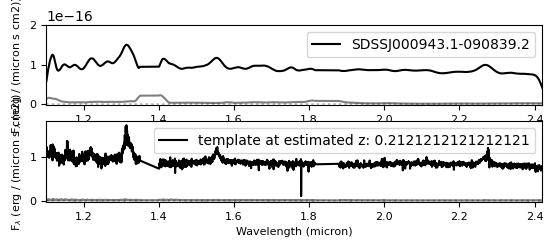

In [6]:
z_mean, z_std = quasar.find_best_redshift(targ_sp, (0, 0.5), 100, 5, plotting = True)

As shown above, the emission features in both spectra align suggesting that the estimated redshift is correct.

### Plotting statistics

To see how the correlation coefficient and chi-squared vary with the tested redshifts, use the **statistics** parameter.

  0%|          | 0/5 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

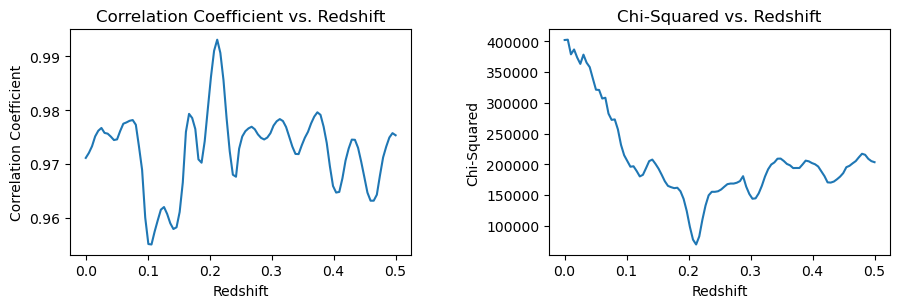

100%|██████████| 5/5 [00:13<00:00,  2.67s/it]

The best redshift estimate is 0.2121212121212121 +/- 2.7755575615628914e-17


In [7]:
z_mean, z_std = quasar.find_best_redshift(targ_sp, (0, 0.5), 100, 5, statistics = True)

Here, the redshift estimate z = 0.21 is the location of the correlation coefficient's global maximum and chi-squared's global minimum, a good indication that the estimate is correct.

### Plotting correlation bounds

The code estimates the target's redshift by cross-correlating the target with a chosen template. However, the whole spectrum is not cross-correlated; rather, the code identifies emission features in the target spectrum and only cross-correlates these features against the template.

To see the identified emission features and the correlation bounds around these features, use the **bounds** parameter:

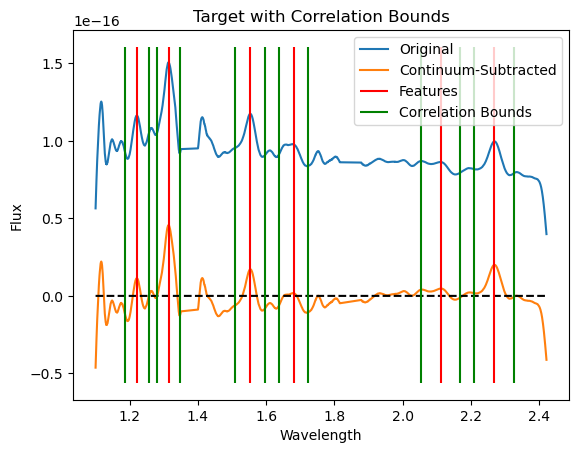

100%|██████████| 5/5 [00:12<00:00,  2.54s/it]

The best redshift estimate is 0.2121212121212121 +/- 2.7755575615628914e-17


In [8]:
z_mean, z_std = quasar.find_best_redshift(targ_sp, (0, 0.5), 100, 5, bounds = True)

Here, the blue spectrum is the original target spectrum and the orange spectrum is the target after its continuum has been subtracted. The red lines identify the emission features in the target and the green lines illustrate the cross-correlation bounds.

If the code ever returns a suspicious redshift estimate, **bounds** should be the first thing you check! Ensure that the code is identifying emission features and setting correlation bounds around them.

### Plotting MC simulations

Lastly, the code determines the error on the redshift estimate by running MC simulations of the target spectrum. To visualize these simulations, use the **MC** parameter:

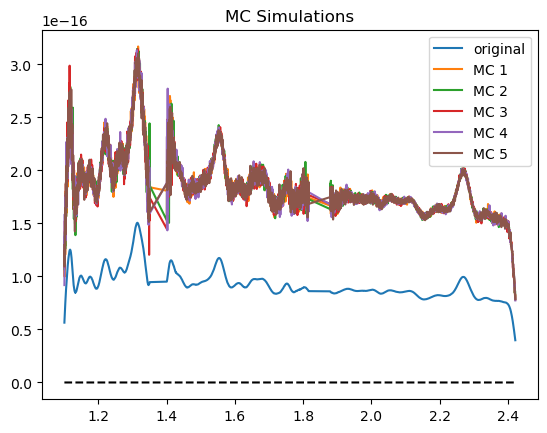

100%|██████████| 5/5 [00:13<00:00,  2.70s/it]

The best redshift estimate is 0.2121212121212121 +/- 2.7755575615628914e-17


In [9]:
z_mean, z_std = quasar.find_best_redshift(targ_sp, (0, 0.5), 100, 5, MC = True)